In [1]:
#### ML1 Homework 3 
#### Name: Yeon Kyung, Chung


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn as sk

#!pip install graphviz
from IPython.display import Image
import pydotplus
import graphviz

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import sklearn as sk

from scipy import misc

In [2]:
# import pregnancy.csv file
pdata = pd.read_csv("pregnancy.csv")
pdata.head()

,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [3]:
# check null value in any columns
pdatanull = pdata.loc[pdata.isnull().any(axis=1)]
pdatanull.shape[0]

0

In [4]:
###  3-1 Generate the probability that a customer in the dataset is pregnant

#Percent format funciton
def percentformat(n):
    return '{:.1%}'.format(n)

pregnantcount = (pdata['PREGNANT']==1).sum()
total = len(pdata)
pregnantprob = percentformat(float(pregnantcount)/float(total))

# Return Pregnant Probability 
print('Pregnant Probability is {}'.format(pregnantprob))

Pregnant Probability is 28.0%


In [5]:
###  3-2 Correctly classify your variables before running the model.

# "PREGNANT": Nominal
print("PREGNANT Values:{}".format(pdata['PREGNANT'].unique()))
print("Stopped buying ciggies Values:{}".format(pdata['Stopped buying ciggies'].unique()))
print("Stopped buying wine Values:{}".format(pdata['Stopped buying wine'].unique()))
print("Maternity Clothes Values:{}".format(pdata['Maternity Clothes'].unique()))

pdata["IsPREGNANT"] = pdata['PREGNANT'].apply(lambda x: "True" if str(x) == "1" else "False") 
pdata["BuyMaternityClothes"]=pdata["Maternity Clothes"].apply(lambda x: "Buying" if str(x)=="1" else "Not Buying")
pdata.head(5)

PREGNANT Values:[1 0]
Stopped buying ciggies Values:[0 1]
Stopped buying wine Values:[0 1]
Maternity Clothes Values:[0 1]


,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT,IsPREGNANT,BuyMaternityClothes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,True,Not Buying
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,True,Not Buying
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,True,Not Buying
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,True,Not Buying
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,True,Not Buying


#### "PREGNANT": Nominal 
#### "Stopped buying ciggies", "Stopped buying wine", "Maternity Clothes": Nominal 

In [6]:
### 3-3 Create your feature and label sets, as your training and test sets.

x = pdata.loc[:, ["Stopped buying ciggies", "Stopped buying wine", "Maternity Clothes"]]
y = pdata['PREGNANT']

# divide training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

print('Training Set: {:3.0f}%'.format(X_train.shape[0]/x.shape[0]*100))
print('Test Set: {:3.0f}%'.format(X_test.shape[0]/x.shape[0]*100))
x.head()

Training Set:  80%
Test Set:  20%


,Stopped buying ciggies,Stopped buying wine,Maternity Clothes
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0


In [7]:
###  3-4 Generate two tree models using both measures of impurity: Gini and Cross-Entropy.

#function: Initialize and create a decision tree model
def createdecisiontree(data, target, cretersionvalue, numdepth):
    print(data.head())
    decision_tree = tree.DecisionTreeClassifier(
        criterion = cretersionvalue,
        max_features=1,
        max_depth=numdepth,
        random_state=1000
    )
    decision_tree.fit(data, target)
    return decision_tree

#Model1: gini decision tree with two depth
decision_tree1 = createdecisiontree(x, y, 'gini', 2)
#Model2: entropy decision tree with two depth
decision_tree2 = createdecisiontree(x, y,  'entropy', 2)


   Stopped buying ciggies  Stopped buying wine  Maternity Clothes
0                       0                    0                  0
1                       0                    0                  0
2                       0                    0                  0
3                       0                    0                  0
4                       0                    1                  0
   Stopped buying ciggies  Stopped buying wine  Maternity Clothes
0                       0                    0                  0
1                       0                    0                  0
2                       0                    0                  0
3                       0                    0                  0
4                       0                    1                  0


/Users/joanne/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


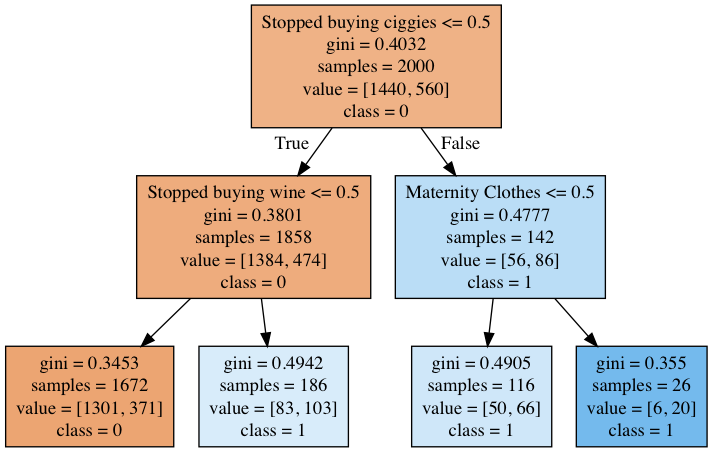

In [8]:
###  3-5 Plot both models.

# function for creating a graph using decsion tree
def dotdata(decision_tree):
    return tree.export_graphviz(
            decision_tree, out_file=None,
            feature_names=x.columns,
            class_names=['0', '1'],
            filled=True
        )

#plot Model1: gini decision tree
sk.tree.export_graphviz(decision_tree1)
dot_data = dotdata(decision_tree1)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 


/Users/joanne/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


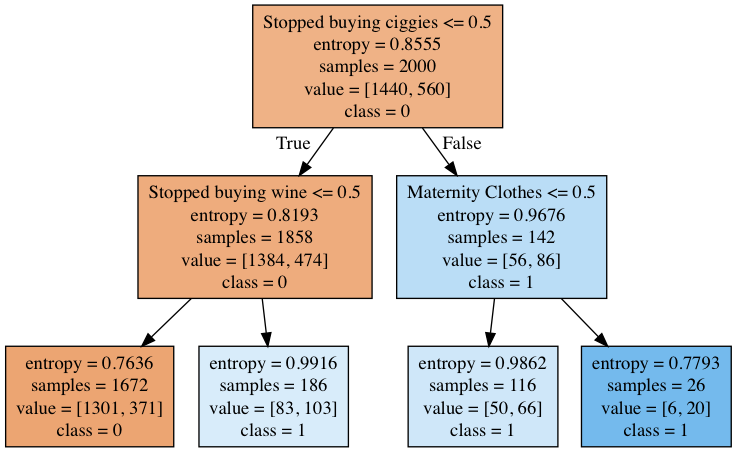

In [9]:
#plot Model2: entropy decision tree
sk.tree.export_graphviz(decision_tree2)
dot_data = dotdata(decision_tree2)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


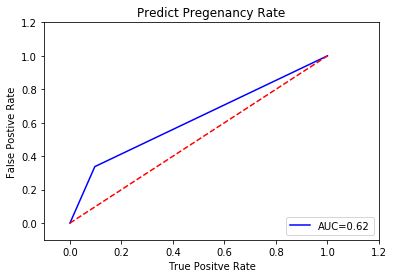

In [11]:
###  3-6 Compare results by testing the accuracy using ROC/Confusion Matrix.

#make a graph function for False positive rate and True positvie rate
def makeplot(realvalue, predvalue):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(realvalue, predvalue) 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title("Predict Pregenancy Rate")
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC=%0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.xlabel('True Positve Rate')
    plt.ylabel('False Postive Rate')
    plt.show()
    
    
# Model1 Predit: gini decision tree precit
decisionpred1 = decision_tree1.predict(x)
sk.metrics.confusion_matrix(y, decisionpred1)
#makeplot Model1(false_positive_rate, true_positive_rate, roc_auc)
makeplot(y, decisionpred1)   

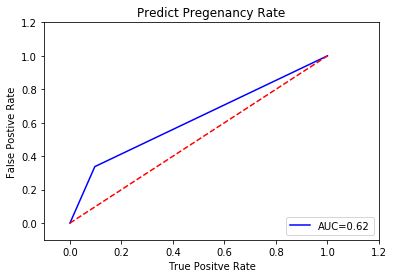

In [12]:
# Model2 Predit: entropy decision tree precit
decisionpred2 = decision_tree2.predict(x)
sk.metrics.confusion_matrix(y, decisionpred2)
# graph for entropy decision tree
makeplot(y, decisionpred2)   

   Stopped buying ciggies  Stopped buying wine  Maternity Clothes
0                       0                    0                  0
1                       0                    0                  0
2                       0                    0                  0
3                       0                    0                  0
4                       0                    1                  0


/Users/joanne/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


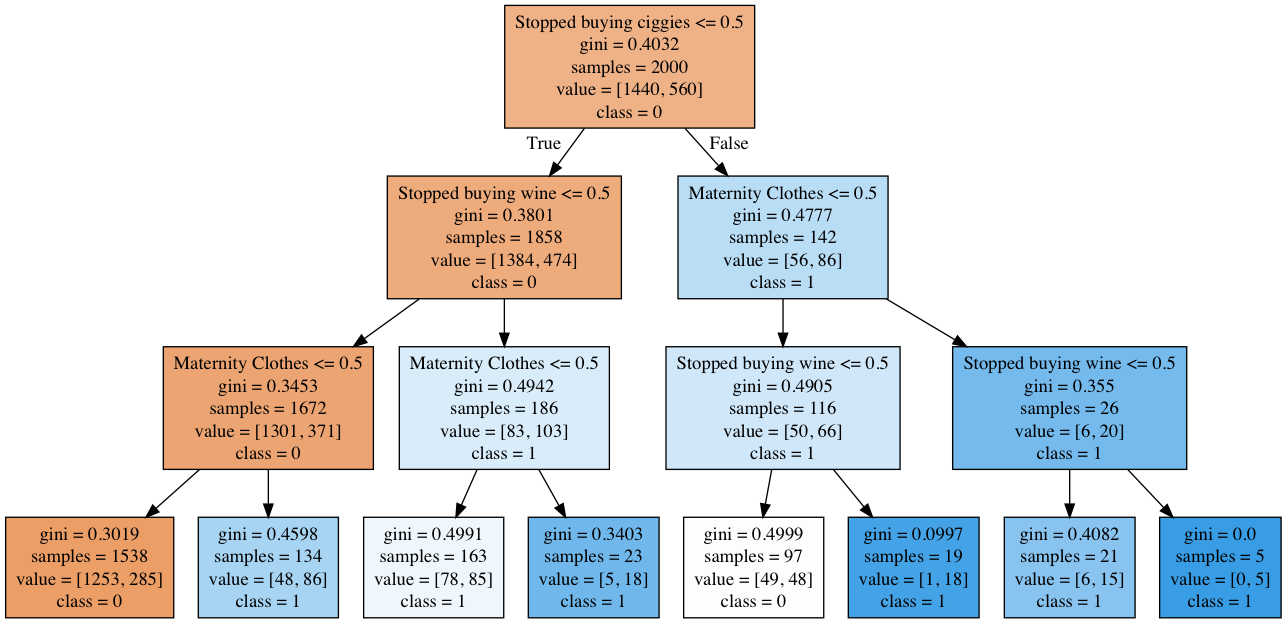

In [13]:
### - Adjust the depth of the tree and again compare the outcomes. 
###                      How does this compare to the target measure? Is the model better than just guessing?



#Model1 with Depth 4: gini decision tree
decision_tree_fourdpeth1 = createdecisiontree(x, y, 'gini', 4)
#plot Model1 with Depth 4: gini decision tree
sk.tree.export_graphviz(decision_tree_fourdpeth1)
dot_data = dotdata(decision_tree_fourdpeth1)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

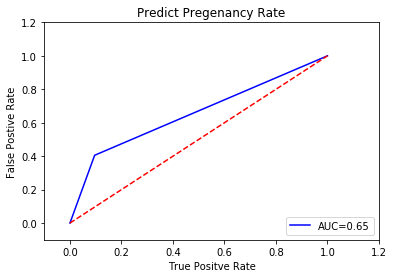

In [14]:
# Model1 Predition with Depth 4: gini decision tree precit
decisionpred_fourdepth1 = decision_tree_fourdpeth1.predict(x)
sk.metrics.confusion_matrix(y, decisionpred_fourdepth1)
#makeplot(false_positive_rate, true_positive_rate, roc_auc)
makeplot(y, decisionpred_fourdepth1) 

   Stopped buying ciggies  Stopped buying wine  Maternity Clothes
0                       0                    0                  0
1                       0                    0                  0
2                       0                    0                  0
3                       0                    0                  0
4                       0                    1                  0


/Users/joanne/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


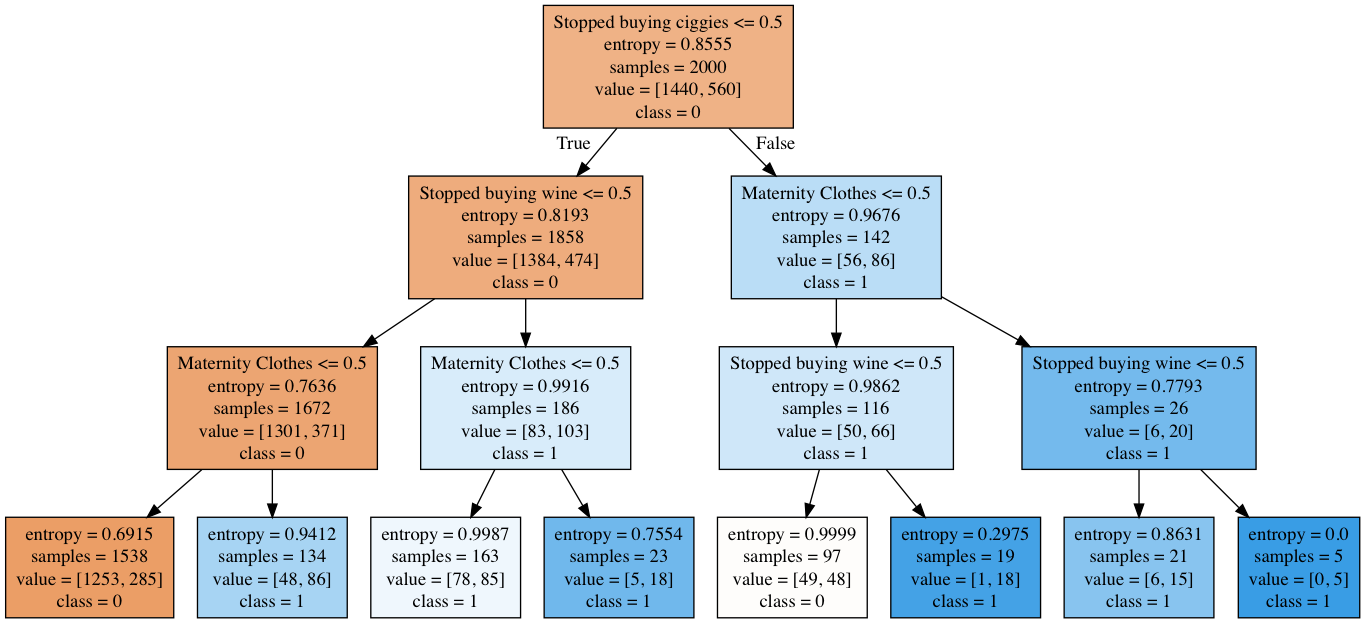

In [15]:
# Model2 with Depth 4:: entropy decision tree
decision_tree_fourdpeth2 = createdecisiontree(x, y,  'entropy', 4)
#plot Model1 with Depth 4: entropy decision tree
sk.tree.export_graphviz(decision_tree_fourdpeth2)
dot_data = dotdata(decision_tree_fourdpeth2)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

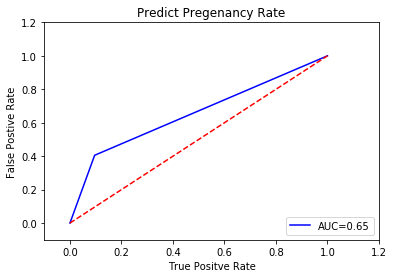

In [16]:
#Model2 Predition with Depth 4: entropy decision tree precit
decisionpred_fourdpeth2 = decision_tree_fourdpeth2.predict(x)
sk.metrics.confusion_matrix(y, decisionpred_fourdpeth2)
#makeplot(false_positive_rate, true_positive_rate, roc_auc)
makeplot(y, decisionpred_fourdpeth2)

In [17]:
###                      How does this compare to the target measure? Is the model better than just guessing?
# Answer: "Model with Depth 2" has AUC= 0.62 and "Model with Depth 4" has AUC=0.65.
#         Both of AUC show the poor accuracy because it is less than 0.7
#         However, the higher depth represents a better prediction.